In [24]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

from pandas import read_html

In [25]:
# Definitions; Variables

hour= UNITS.hour
parking= 10

cars1= State(parking=10)

cars2= State(parking=10)

# Parameters for cars1 ($25/h)
p1= .6
p2= .7
p3= .4

# Parameters for cars2 ($35/h)
p4= .5
p5= .6
p6= .4

0.4

In [26]:
# Definitions; Functions

# One car leaves per hour, so adding zero cars is the same as the total number of cars in the lot decreasing by one. The same is true for adding one car, two cars, etc.

#$25 lot
def minus_one_car1():
    cars1.parking -= 1

def add_zero_cars1():
    cars1.parking += 0

def add_two_cars1():
    cars1.parking += 2

#$35 lot
def minus_one_car2():
    cars2.parking -= 1

def add_zero_cars2():
    cars2.parking += 0

def add_two_cars2():
    cars2.parking += 2

In [27]:
# New object
cars1= State(parking=10)
cars2= State(parking=10)

parking    10
dtype: int64

In [28]:
# Empty TimeSeries
results1 = TimeSeries()
results2 = TimeSeries()

TimeSeries([], dtype: float64)

In [29]:
# Gimme da numbers
results1[0] = cars1.parking
results2[0] = cars2.parking
print('Cars in $25 garage:', cars1.parking, ',', 'Cars in $35 garage:', cars2.parking)

Cars in $25 garage: 10 , Cars in $35 garage: 10


In [33]:
# I prolly don't need to define this Step for the third time but I REALLY don't wanna piss this thingy off

if flip(p1) and cars1.parking < 225:
    minus_one_car1()
if flip(p3) and cars1.parking > 0:
    add_two_cars1()

def step(p1, p2, p3):
    if flip(p1):
        minus_one_car1()
    if flip(p2):
        add_two_cars1()
    if flip(p3):
        add_zero_cars1()

total_cost1 = 0

# Now do the thing to show us the stuff

for i in range(10):
    step(p1, p2, p3)
    results1[i] = cars1.parking
    total_cost1 += 25 * cars1.parking

In [34]:
if flip(p4) and cars2.parking > 0:
    minus_one_car2()
if flip(p6) and cars2.parking < 223:
    add_two_cars2()

def step(p4, p5, p6):
    if flip(p4):
        minus_one_car2()
    if flip(p5):
        add_zero_cars2()
    if flip(p6):
        add_two_cars2()

total_cost2 = 0

for i in range(10):
    step(p4, p5, p6)
    results2[i] = cars2.parking
    total_cost2 += 35 * cars2.parking

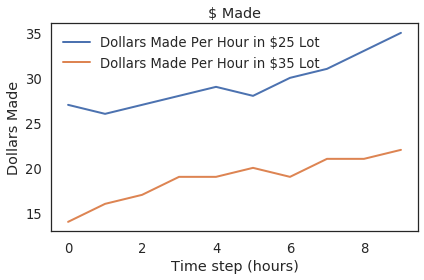

In [35]:
# Make it pretty

plot(results1, label='Dollars Made Per Hour in $25 Lot')
decorate(title='Number of Cars Per Hour',
         xlabel='Time step (hours)',
         ylabel='Dollars Made')

plot(results2, label='Dollars Made Per Hour in $35 Lot')
decorate(title='$ Made',
         xlabel='Time step (hours)',
         ylabel='Dollars Made')